# Zebrafish pigmentation

In [1]:
import warnings
warnings.filterwarnings('ignore')

import dynamo as dyn 
from dynamo.configuration import DKM
import numpy as np
import pandas as pd

this is like R's sessionInfo() which helps you to debug version related bugs if any. 

## Load data

In [2]:
adata_origin = dyn.sample_data.zebrafish()

|-----> Downloading data to ./data/zebrafish.h5ad


## Apply Monocle (spliced, unspliced data) + Pearson Residual (adata.X) to adata

In [3]:
from dynamo.preprocessing import Preprocessor
adata = dyn.sample_data.zebrafish()
preprocessor = Preprocessor()
preprocessor.preprocess_adata(adata, recipe="monocle_pearson_residuals")
# preprocessor.config_sctransform_recipe(adata)
# preprocessor.sctransform_kwargs = {"layers": ["unspliced"]}
# preprocessor.preprocess_adata_sctransform(adata)
adata

|-----> Downloading data to ./data/zebrafish.h5ad
|-----------> <insert> {} to uns['pp'] in AnnData Object.
|-----------> <insert> {'norm_method': None} to uns['pp'] in AnnData Object.
|-----------> <insert> tkey=None to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type=None to uns['pp'] in AnnData Object.
|-----> making adata observation index unique...
|-----> applying collapse species adata...
|-----> applying convert_gene_name function...
|-----> making adata observation index unique after gene name conversion...
|-----> gene selection on layer: X
|-----> extracting highly variable genes
|-----> rounding expression data of layer: X during size factor calculation
|-----> rounding expression data of layer: spliced during size factor calculation
|-----> rounding expression data of layer: unspliced during size factor calculation
|-----> size factor normalize following layers: ['spliced', 'unspliced', 'X']
|-----> applying None to layer<spliced>
|-----> <insert> X_spli

AnnData object with n_obs × n_vars = 4181 × 16940
    obs: 'split_id', 'sample', 'Size_Factor', 'condition', 'Cluster', 'Cell_type', 'umap_1', 'umap_2', 'batch', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size'
    var: 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'gene_highly_variable', 'use_for_pca'
    uns: 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean'
    obsm: 'X_pca'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced'

In [4]:
print(adata.layers["X_unspliced"].min())
print(adata.layers["X_spliced"].min())
print(adata.X.min())

0.0
0.0
-7.4068885


|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [233.5554s]


<Figure size 1200x1200 with 0 Axes>

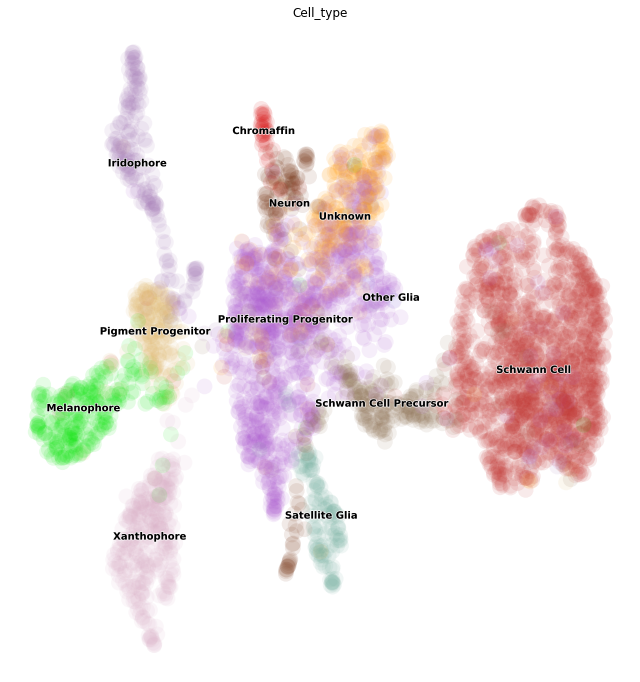

In [5]:

celltype_key = "Cell_type"
dyn.tl.reduceDimension(adata, basis="pca")
dyn.pl.umap(adata, color=[celltype_key], figsize=(12, 12))


|-----> accessing adj_matrix_key=connectivities built from args for clustering...
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> Detecting communities on graph...
|-----------> Converting graph_sparse_matrix to networkx object
|-----> Detecting community with initial_membership input from caller
|-----> [Community clustering with leiden] in progress: 100.0000%
|-----> [Community clustering with leiden] finished [237.6564s]


<Figure size 600x400 with 0 Axes>

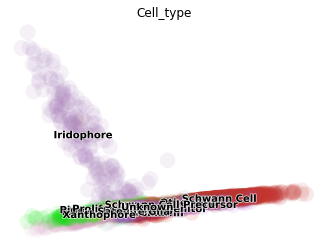

|-----> accessing adj_matrix_key=connectivities built from args for clustering...
|-----> Detecting communities on graph...
|-----------> Converting graph_sparse_matrix to networkx object
|-----> [Community clustering with louvain] in progress: 100.0000%
|-----> [Community clustering with louvain] finished [6.0640s]


<Figure size 600x400 with 0 Axes>

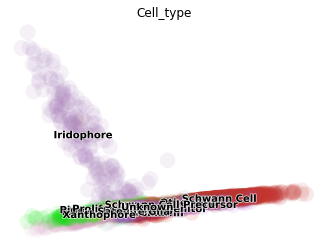

In [6]:
dyn.tl.leiden(adata, basis="pca")
dyn.pl.leiden(adata, basis="pca", color="Cell_type")
dyn.tl.louvain(adata, basis="pca")
dyn.pl.louvain(adata, basis="pca", color="Cell_type")

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [59.1210s]
|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.ind

<Figure size 600x400 with 0 Axes>

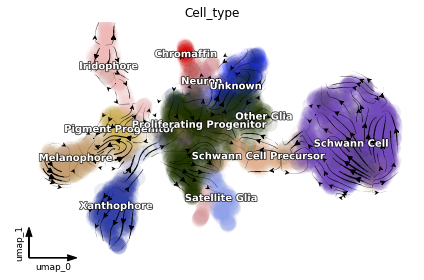

In [7]:
dyn.tl.dynamics(adata, model='stochastic', cores=3)
dyn.pl.streamline_plot(adata, color=[celltype_key], basis='umap', show_legend='on data', show_arrowed_spines=True)

<Figure size 600x400 with 0 Axes>

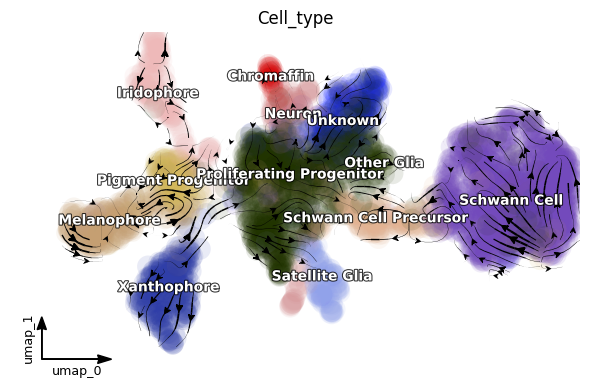

In [8]:
dyn.pl.streamline_plot(adata, color=[celltype_key], basis='umap', show_legend='on data', show_arrowed_spines=True);


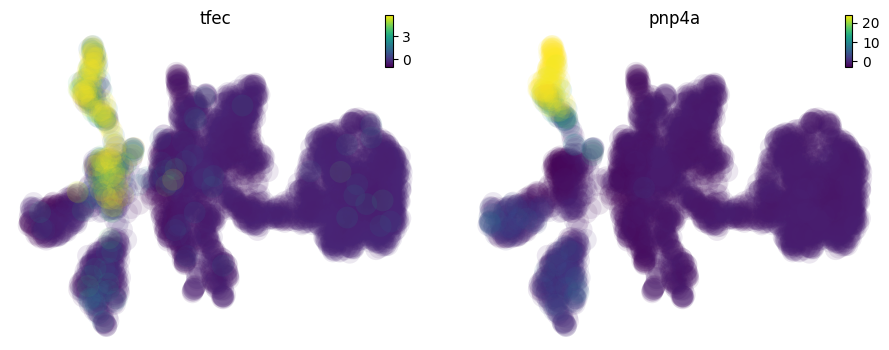

In [9]:
dyn.pl.umap(adata, color=['tfec', 'pnp4a'])

In [10]:
adata.uns["pp"]

{'norm_method': 'log1p',
 'tkey': None,
 'has_splicing': True,
 'has_labeling': False,
 'has_protein': False,
 'splicing_labeling': False,
 'experiment_type': 'conventional',
 'experiment_layers': ['X', 'spliced', 'unspliced'],
 'experiment_total_layers': None,
 'hvg': {'flavor': 'pearson_residuals', 'computed_on': 'adata.X'},
 'X_pearson_residuals_normalization_params': {'theta': 100,
  'clip': None,
  'layer': 'X'}}